# Breast Cancer

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Desktop\fsds materials\fsds\3. Aug\28th\projects\KNN\brest cancer.txt')
dataset

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


## Exploratory Data Analysis

In [4]:
dataset.shape

(698, 11)

## Rename Column Names

In [5]:
col_names = ['Id','Clump_thickness','Uniformity_Cell_Size','Uniformity_Cell_Shape','Marginal_Adhesion',
            'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','class']
dataset.columns = col_names
dataset.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'class'],
      dtype='object')

In [6]:
dataset.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


## Drop Redundant Columns

In [7]:
dataset.drop('Id',axis=1,inplace=True)

## View Summary of Dataset

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              698 non-null    int64 
 1   Uniformity_Cell_Size         698 non-null    int64 
 2   Uniformity_Cell_Shape        698 non-null    int64 
 3   Marginal_Adhesion            698 non-null    int64 
 4   Single_Epithelial_Cell_Size  698 non-null    int64 
 5   Bare_Nuclei                  698 non-null    object
 6   Bland_Chromatin              698 non-null    int64 
 7   Normal_Nucleoli              698 non-null    int64 
 8   Mitoses                      698 non-null    int64 
 9   class                        698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


## Frequency distribution of values in variables

In [9]:
for var in dataset.columns:
    print(dataset[var].value_counts())

1     145
5     129
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     383
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     352
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     406
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     385
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     164
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     442
10     

## Convert Data Type of Bare_Nuclei to integer

In [10]:
dataset['Bare_Nuclei'] = pd.to_numeric(dataset['Bare_Nuclei'],errors ='coerce')

## Check Data Types of Columns of DataFrame

In [11]:
dataset.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
class                            int64
dtype: object

## Summary of Variables

There are 10 Numerical Variables in the dataset

All of the variables are of discrete type

Out of all the 10 variables the first 9 variables are feature variables and last variable class is the target variable

## Missing Values in Variables

In [12]:
dataset.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
class                           0
dtype: int64

We can see that the `Bare_Nuclei` column contains missing values. We need to dig deeper to find the frequency distribution of 
values of `Bare_Nuclei`.

In [13]:
dataset.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
class                           0
dtype: int64

In [14]:
dataset['Bare_Nuclei'].value_counts()

1.0     401
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [15]:
# Check unique values in 'Bare_Nuclei' column
dataset['Bare_Nuclei'].unique()

array([10.,  2.,  4.,  1.,  3.,  9.,  7., nan,  5.,  8.,  6.])

We can see that there are `nan` values in the `Bare_Nuclei` column.

In [16]:
# Check for nan values in 'Bare_Nuclei' column
dataset['Bare_Nuclei'].isna().sum()

16

We can see that there are 16 `nan` values in the dataset. I will impute missing values after dividing the dataset into training and test set.

## Check Frequency Distribution of Target Variable class

In [18]:
# View frequency distribution of values in 'Class' variable
dataset['class'].value_counts()

2    457
4    241
Name: class, dtype: int64

## Check Percentage of Frequency Distribution of class

In [20]:
# View percentage of frequency distribution of values in 'class' variable
dataset['class'].value_counts()/np.float(len(dataset))

2    0.654728
4    0.345272
Name: class, dtype: float64

We can see that the `Class` variable contains 2 class labels - `2` and `4`. `2` stands for benign and `4` stands for malignant cancer.

## Outliers in Numerical Varibales

In [21]:
# View summary statistics in numerical variables
print(round(dataset.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           698.00                698.00                 698.00   
mean              4.42                  3.14                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             698.00                       698.00       682.00   
mean                2.81                         3.22         3.55   
std                 2.86                         2.22         3.65   
min                 1.00                         1.00         1.00   
25%       

KNN algorithm is robust to outliers

# Data Visualization

## Univariate Plots

Check the distribution of variables

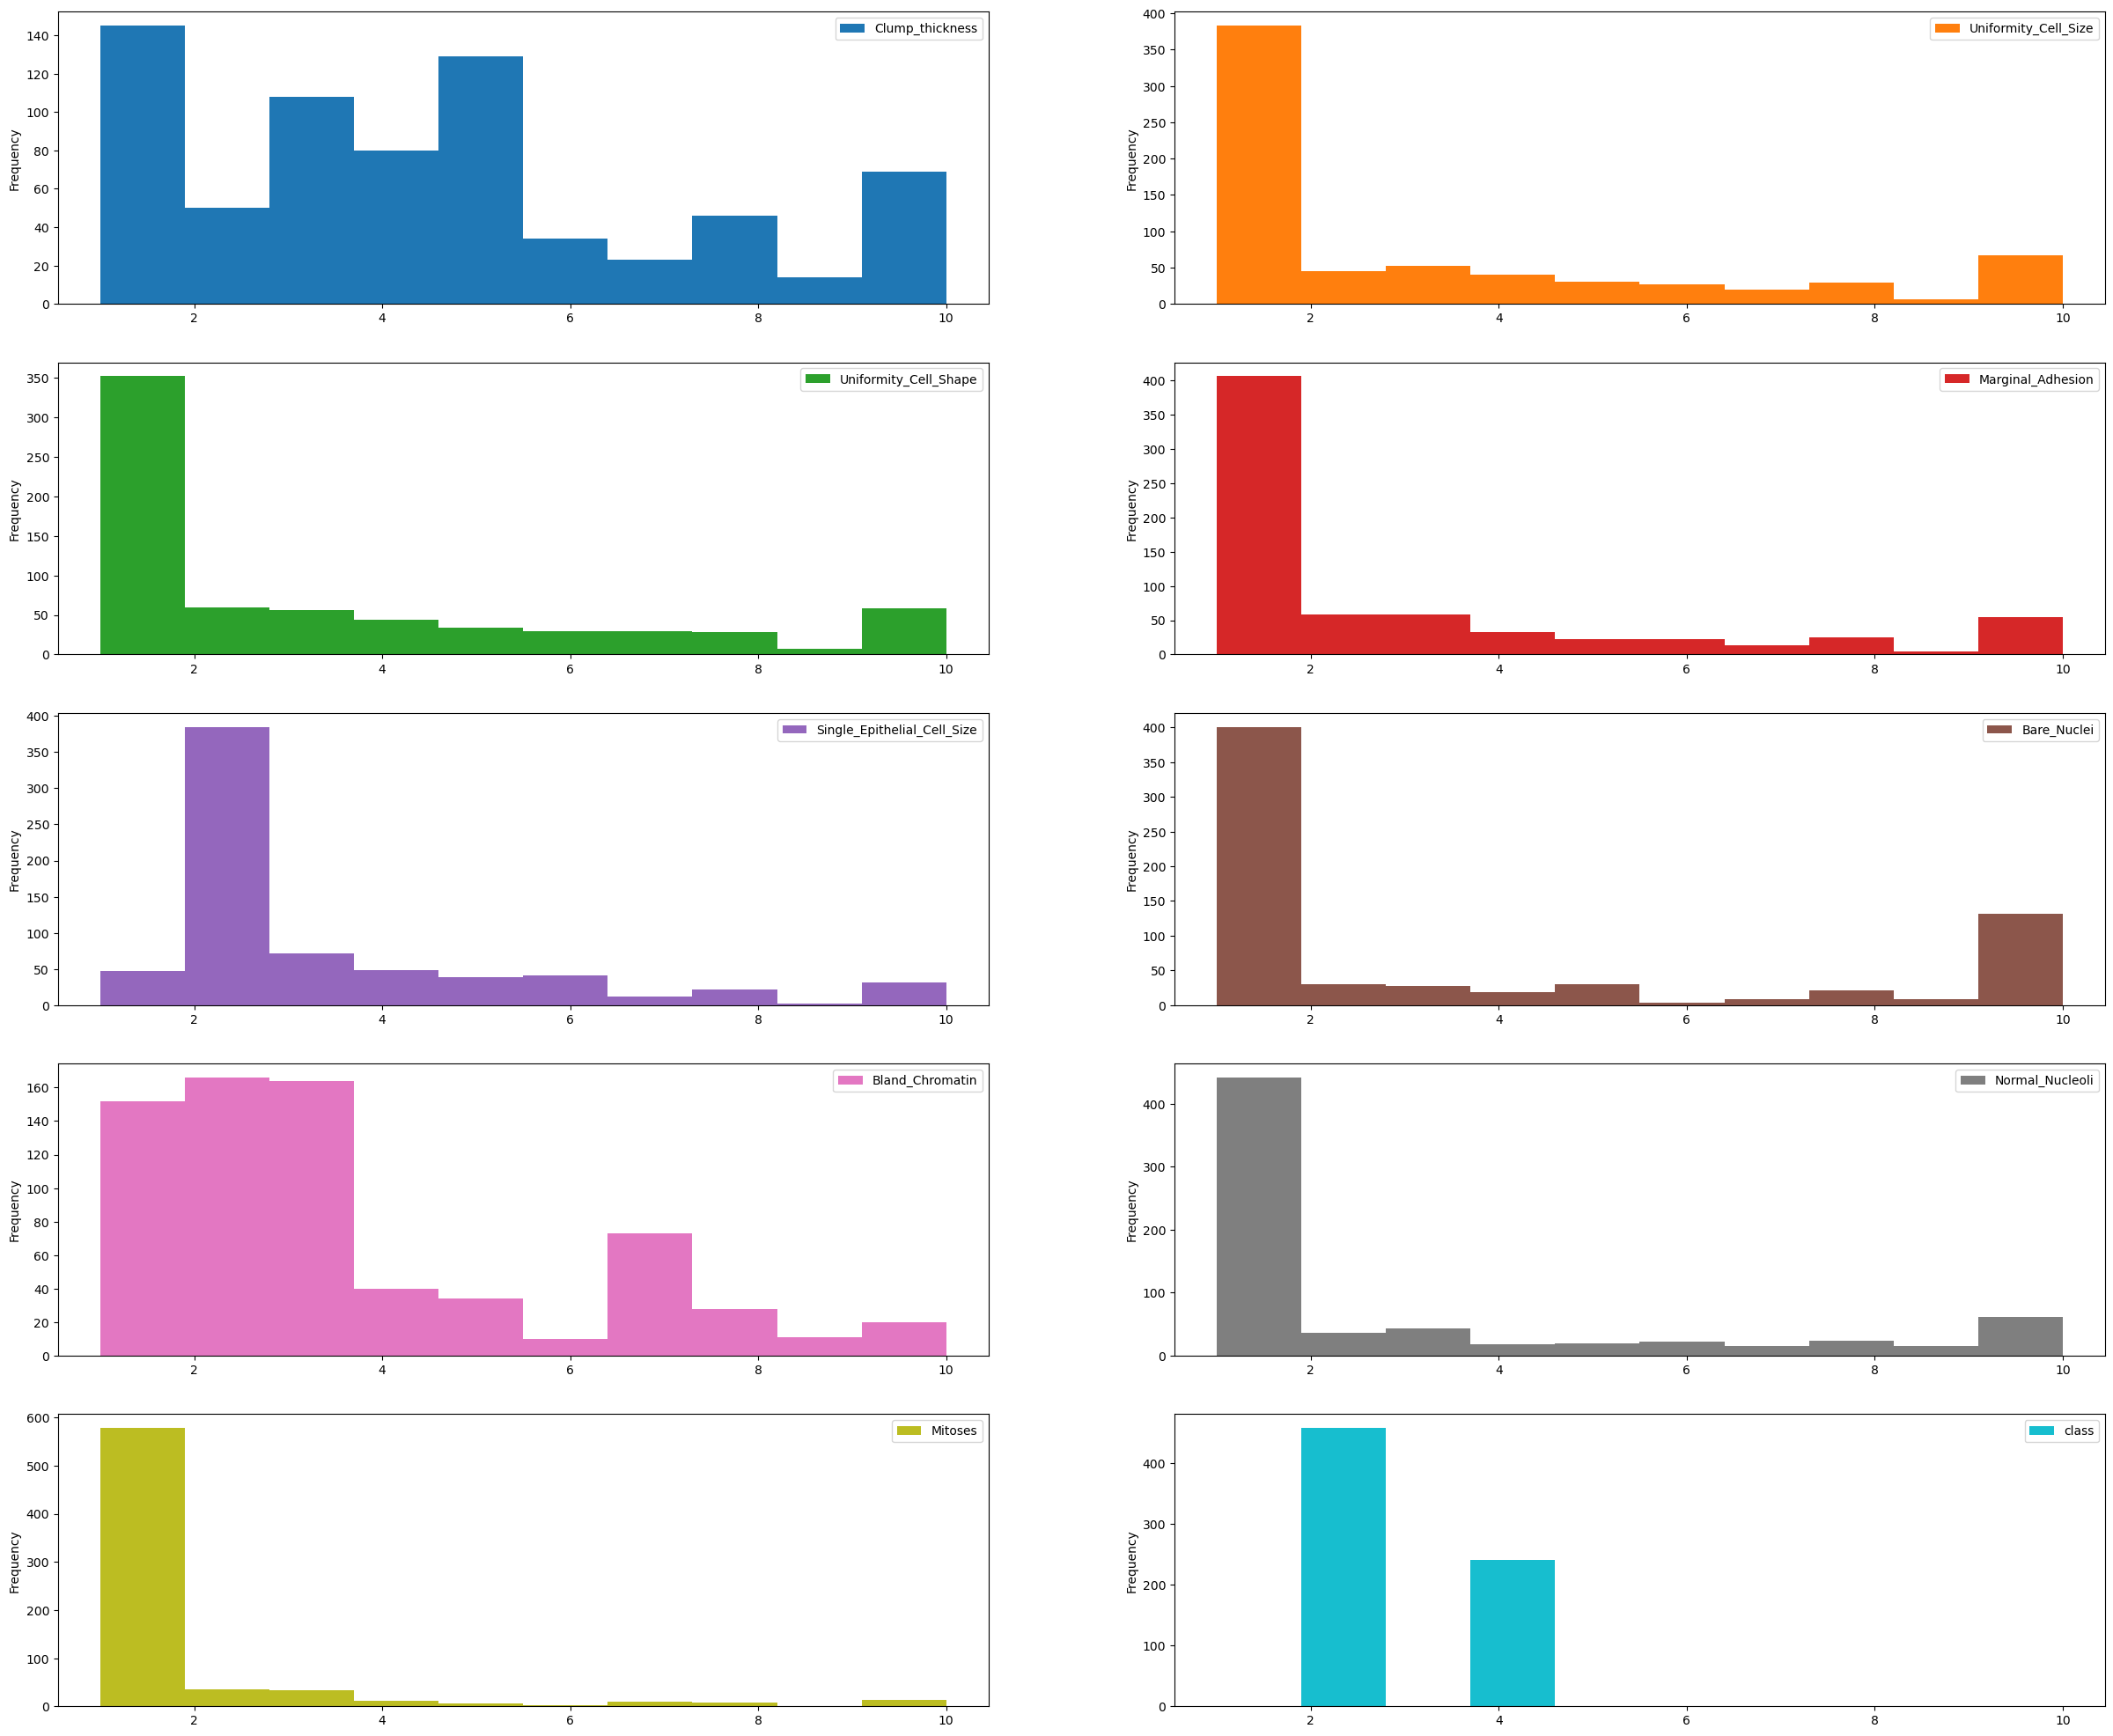

In [22]:
# Plot histograms of the variables
plt.rcParams['figure.figsize']=(30,25)
dataset.plot(kind='hist',bins=10,subplots=True, layout =(5,2),sharex = False,sharey = False)
plt.show()

## Multivariate Plots

### Estimating correlation coefficients
Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. We can compute it using the `df.corr()` method as follows:-

In [25]:
correlation = dataset.corr()

Our target variable is `Class`. So, we should check how each attribute correlates with the `Class` variable. We can do it as follows:-

In [26]:
correlation['class'].sort_values(ascending=False)

class                          1.000000
Bare_Nuclei                    0.822563
Uniformity_Cell_Shape          0.818794
Uniformity_Cell_Size           0.817772
Bland_Chromatin                0.756732
Clump_thickness                0.716509
Normal_Nucleoli                0.712067
Marginal_Adhesion              0.696605
Single_Epithelial_Cell_Size    0.682618
Mitoses                        0.423008
Name: class, dtype: float64

## Interpretation 

- The correlation coefficient ranges from -1 to +1. 

- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between `Class` and `Bare_Nuclei`, `Class` and `Uniformity_Cell_Shape`, `Class` and `Uniformity_Cell_Size`.

- When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation. 

- We can see that all the variables are positively correlated with `Class` variable. Some variables are strongly positive correlated while some variables are negatively correlated.

## Discover patterns and relationships 

An important step in EDA is to discover patterns and relationships between variables in the dataset. I will use the seaborn heatmap to explore the patterns and relationships in the dataset.


# Correlation Heat Map

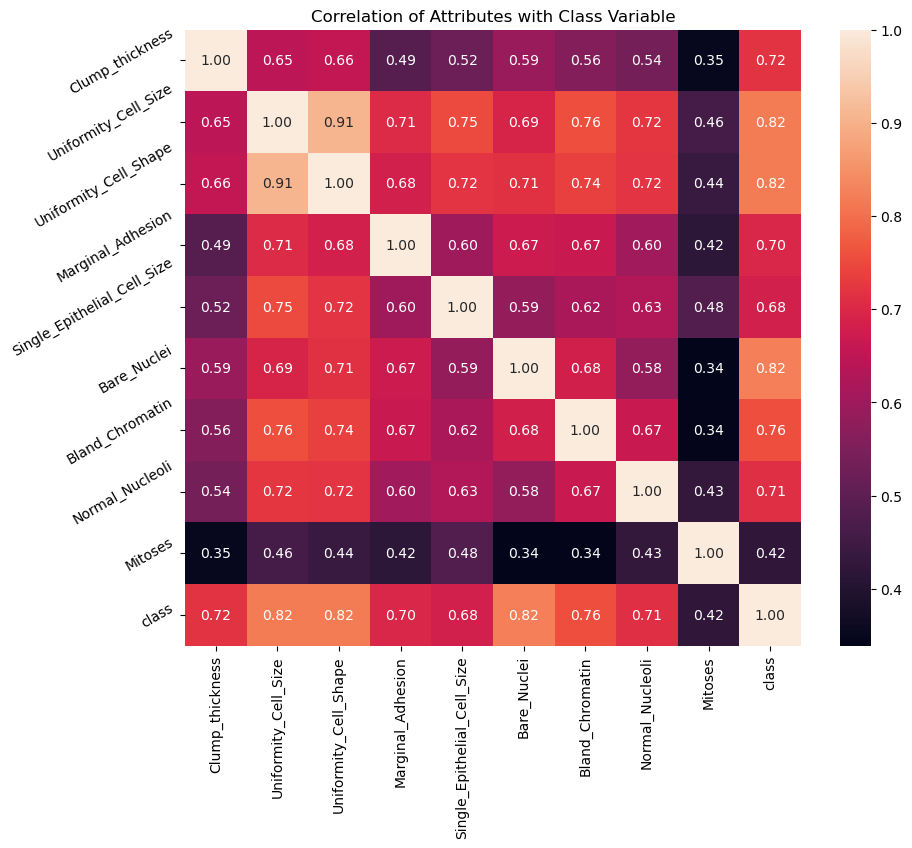

In [31]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class Variable')
a = sns.heatmap(correlation, square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()

### Interpretation


From the above correlation heat map, we can conclude that :-

1. `Class` is highly positive correlated with `Uniformity_Cell_Size`, `Uniformity_Cell_Shape` and `Bare_Nuclei`. (correlation coefficient = 0.82).

2. `Class` is positively correlated with `Clump_thickness`(correlation coefficient=0.72), `Marginal_Adhesion`(correlation coefficient=0.70), `Single_Epithelial_Cell_Size)`(correlation coefficient = 0.68) and `Normal_Nucleoli`(correlation coefficient=0.71).

3. `Class` is weekly positive correlated with `Mitoses`(correlation coefficient=0.42).

4. The `Mitoses` variable is weekly positive correlated with all the other variables(correlation coefficient < 0.50).

## Declare feature vector and target variable

In [32]:
X = dataset.drop(['class'],axis=1)
y = dataset['class']

## Split data into separate training and test set

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
X_train.shape,X_test.shape

((558, 9), (140, 9))

## Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [35]:
X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

## Engineering missing values in variables

In [36]:
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    15
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [37]:
for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Bare_Nuclei 0.0269


In [39]:
for dataset1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        dataset1[col].fillna(col_median, inplace=True)  

In [41]:
X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [42]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [43]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
62,6,3,4,1,5,2.0,3,9,1
193,3,1,1,1,2,1.0,3,1,1
263,7,9,4,10,10,3.0,5,3,3
222,7,5,6,3,3,8.0,7,4,1
140,2,1,1,1,2,1.0,1,1,1


## Feature Scaling

In [44]:
cols = X_train.columns

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train = pd.DataFrame(X_train,columns=[cols])

In [48]:
X_test = pd.DataFrame(X_test,columns=[cols])

In [49]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.574621,-0.040143,0.277515,-0.629622,0.775913,-0.384119,-0.171342,1.983330,-0.333601
1,-0.497748,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-0.171342,-0.601658,-0.333601
2,0.932077,1.879857,0.277515,2.541854,2.984890,-0.107196,0.660039,0.044589,0.859663
3,0.932077,0.599857,0.943552,0.075150,-0.107678,1.277420,1.491419,0.367712,-0.333601
4,-0.855205,-0.680143,-0.721540,-0.629622,-0.549473,-0.661042,-1.002722,-0.601658,-0.333601


We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

## Fit K Neighbores Classifier to the Training set

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Predict test set Results

In [52]:
y_pred = knn.predict(X_test)
y_pred

array([4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 4], dtype=int64)

## predict_proba method
predict_proba method gives the probabilities for the target variable(2 and 4) in this case, in array form.

`2 is for probability of benign cancer` and `4 is for probability of malignant cancer.`

In [53]:
knn.predict_proba(X_test)[:,0]

array([0.        , 1.        , 0.        , 0.33333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 1.     

## Check accuracy score

In [54]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score: 0.9714


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

## Compare the train-set and test-set accuracy

In [55]:
y_pred_train = knn.predict(X_train)

In [57]:
print('Training-set accuracy score:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Training-set accuracy score:0.9803


## Check for Overfitting and Underfitting

In [58]:
print('Training set score: {:.4f}'.format(knn.score(X_train,y_train)))
print('Training set score: {:.4f}'.format(knn.score(X_test,y_test)))


Training set score: 0.9803
Training set score: 0.9714


## Compare model accuracy with null accuracy
So, the model accuracy is 0.9714. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set

In [60]:
y_test.value_counts()

2    85
4    55
Name: class, dtype: int64

We can see that the occurences of most frequent class is 85. So, we can calculate null accuracy by dividing 85 by total number of occurences.

In [63]:
null_accuracy = (85/(85+55))
print('NUll accuracy score :{0:0.4f}'.format(null_accuracy))

NUll accuracy score :0.6071


We can see that our model accuracy score is 0.9714 but null accuracy score is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

##  Rebuild kNN Classification model using different values of k

I have build the kNN classification model using k=3. Now, I will increase the value of k and see its effect on accuracy.

In [64]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)
print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


## Rebuild kNN Classification model using k=7

In [65]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
y_pred_7 = knn_7.predict(X_test)
print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9571


## Rebuild kNN Classification model using k=8

In [68]:
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(X_train, y_train)
y_pred_8 = knn_8.predict(X_test)
print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9643


## Rebuild kNN Classification model using k=9

In [67]:
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train, y_train)
y_pred_9 = knn_9.predict(X_test)
print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9643


## Interpretation


Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy.


With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement.


If we increase k to 9, then accuracy decreases again to 0.9714.

## Confusion matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**

These four outcomes are summarized in a confusion matrix given below.


In [69]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


The confusion matrix shows `83 + 53 = 136 correct predictions` and `2 + 2 = 4 incorrect predictions`.

In this case, we have

- `True Positives` (Actual Positive:1 and Predict Positive:1) - 83

- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 53

- `False Positives` (Actual Negative:0 but Predict Positive:1) - 2 `(Type I error)`

- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 2 `(Type II error)`

## Comment

So, kNN Classification model with k=7 shows more accurate predictions and less number of errors than k=3 model. Hence, we got performance improvement with k=7.

<AxesSubplot:>

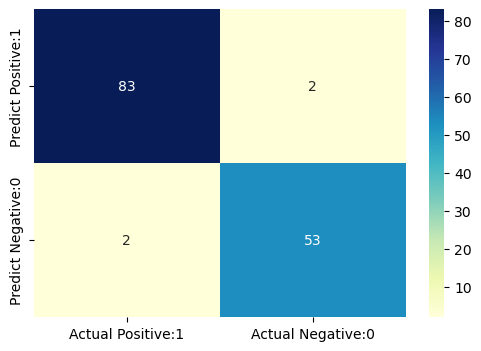

In [73]:
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification metrics
**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96        85
           4       0.95      0.95      0.95        55

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



## Classification accuracy

In [76]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [77]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.9714


In [78]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0286


## Precision

**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 

So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, `precision` can be defined as the ratio of `TP to (TP + FP)`.


In [80]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9765


## Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.

**Recall** identifies the proportion of correctly predicted actual positives.

Mathematically, `recall` can be given as the ratio of `TP to (TP + FN)`.


In [81]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9765


## True Positive Rate

**True Positive Rate** is synonymous with **Recall**.

In [82]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9765


## False Positive Rate

In [83]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0364


## Specify

In [84]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9636


## f1-score
**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.

## Support
**Support** is the actual number of occurrences of the class in our dataset.

## Adjusting the classification threshold level

In [85]:
# print the first 10 predicted probabilities of two classes- 2 and 4
y_pred_prob = knn.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

## Observations
- In each row, the numbers sum to 1.
- There are 2 columns which correspond to 2 classes - 2 and 4. 
    - Class 2 - predicted probability that there is benign cancer.    
    - Class 4 - predicted probability that there is malignant cancer.        
- Importance of predicted probabilities
    - We can rank the observations by probability of benign or malignant cancer.
- predict_proba process
    - Predicts the probabilities    
    - Choose the class with the highest probability        
- Classification threshold level
    - There is a classification threshold level of 0.5.     
    - Class 4 - probability of malignant cancer is predicted if probability > 0.5.    
    - Class 2 - probability of benign cancer is predicted if probability < 0.5.    

In [86]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])
y_pred_prob_df

,Prob of - benign cancer (2),Prob of - malignant cancer (4)
0,0.000000,1.000000
1,1.000000,0.000000
2,0.000000,1.000000
3,0.333333,0.666667
4,1.000000,0.000000
5,1.000000,0.000000
6,1.000000,0.000000
7,1.000000,0.000000
8,1.000000,0.000000
9,1.000000,0.000000


In [87]:
# print the first 10 predicted probabilities for class 4 - Probability of malignant cancer
knn.predict_proba(X_test)[0:10, 1]

array([1.        , 0.        , 1.        , 0.66666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [89]:
# store the predicted probabilities for class 4 - Probability of malignant cancer
y_pred_1 = knn.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

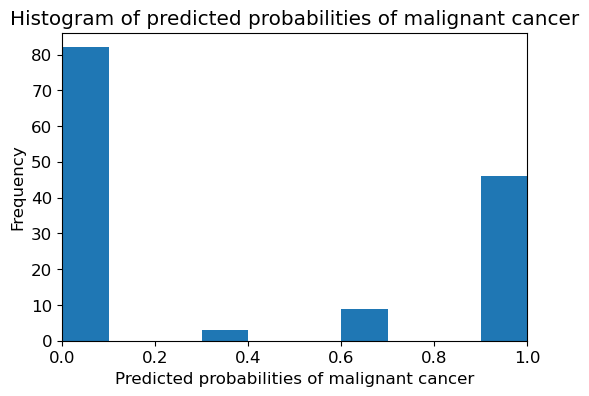

In [90]:
# plot histogram of predicted probabilities
# adjust figure size
plt.figure(figsize=(6,4))
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

## Observations
- We can see that the above histogram is positively skewed.
- The first column tell us that there are approximately 80 observations with 0 probability of malignant cancer.
- There are few observations with probability > 0.5.
- So, these few observations predict that there will be malignant cancer.

## Comments
- In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.
- Threshold can be adjusted to increase sensitivity or specificity. 
- Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.
- Adjusting the threshold level should be one of the last step you do in the model-building process.

## ROC-AUC
## ROC Curve
Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 

classification threshold levels. 

The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.

**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of **TP to (TP + FN)**.

**False Positive Rate (FPR)** is defined as the ratio of **FP to (FP + TN)**.

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

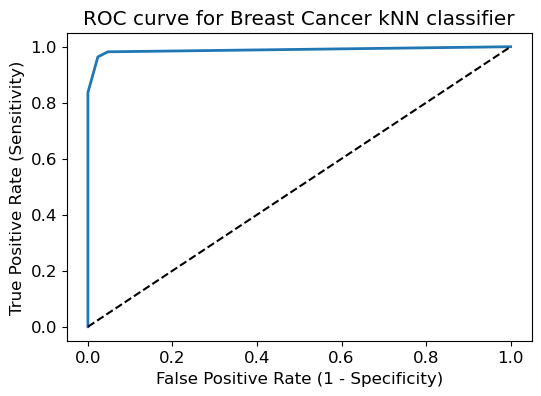

In [91]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1, pos_label=4)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Breast Cancer kNN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

## ROC  AUC
**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 
So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [92]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9883


## Interpretation
- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

In [94]:
# calculate cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9811


## Interpretation

Our Cross Validated ROC AUC is very close to 1. So, we can conclude that, the KNN classifier is indeed a very good model.

## k-fold Cross Validation
In this section, I will apply k-fold Cross Validation technique to improve the model performance. Cross-validation is a statistical method of evaluating generalization performance It is more stable and thorough than using a train-test split to evaluate model performance. 

In [95]:
# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_7, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.96428571 0.98214286 0.96428571 0.98214286 0.96428571 0.94642857
 0.96428571 1.         0.98181818 0.96363636]


In [96]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9713


## Interpretation
- Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

- If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.

- We can see that 10-fold cross-validation accuracy does not result in performance improvement for this model.

## Results and Conclusion
1. In this project, I build a kNN classifier model to classify the patients suffering from breast cancer. The model yields very good performance as indicated by the model accuracy which was found to be 0.9786 with k=7.

2. With k=3, the training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting. 

3. I have compared the model accuracy score which is 0.9714 with null accuracy score which is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

4. Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy. With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement. If we increase k to 9, then accuracy decreases again to 0.9714. So, we can conclude that our optimal value of k is 7.

5. kNN Classification model with k=7 shows more accurate predictions and less number of errors than k=3 model. Hence, we got performance improvement with k=7.

6. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

7. Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

8. If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.


## References

The work done in this project is inspired from following books and websites:-

1.	Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron
2.	Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido
3.	Udemy course – Machine Learning – A Z by Kirill Eremenko and Hadelin de Ponteves
4.	https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
5.	https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
6.	http://dataaspirant.com/2016/12/23/k-nearest-neighbor-classifier-intro/
7.	https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

